In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [133]:
train_df = pd.read_csv('/Users/aidancurley/Documents/dsir/Submissions/Projects/project_2-master/datasets/train.csv')
test_df = pd.read_csv('/Users/aidancurley/Documents/dsir/Submissions/Projects/project_2-master/datasets/test.csv')

Data science is not a linear process. In this project, in particular, you will likely find that EDA, data cleaning, and exploratory visualizations will constantly feed back into each other. Here's an example:

- During basic EDA, you identify many missing values in a column/feature.  
- You consult the data dictionary and use domain knowledge to decide what is meant by this missing feature.  
- You impute a reasonable value for the missing value.  
- You plot the distribution of your feature.  
- You realize what you imputed has negatively impacted your data quality.  
- You cycle back, re-load your clean data, re-think your approach, and find a better solution.  

In [114]:
train_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [115]:
train_df['Overall Cond'].unique()

array([8, 5, 7, 6, 3, 9, 2, 4, 1])

In [26]:
# plt.figure(figsize=(10,6))
# plt.scatter(train_df['Overall Cond'], train_df['SalePrice']);

In [25]:
# plt.figure(figsize=(10,6))
# plt.scatter(train_df['Overall Qual'], train_df['SalePrice']);

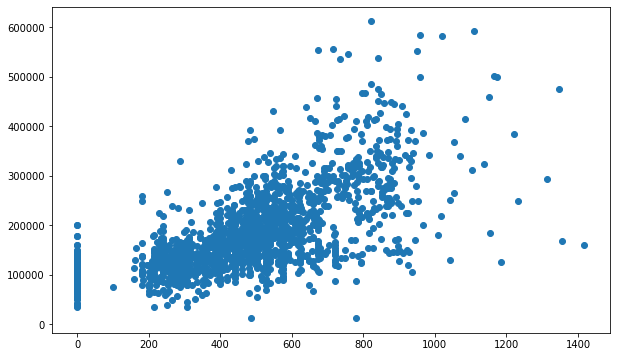

In [86]:
# plt.figure(figsize=(10,6))
# plt.scatter(train_df['Garage Area'], train_df['SalePrice']);

In [30]:
# plt.figure(figsize=(10,6))
# plt.scatter(train_df['BsmtFin SF 1'], train_df['SalePrice']);

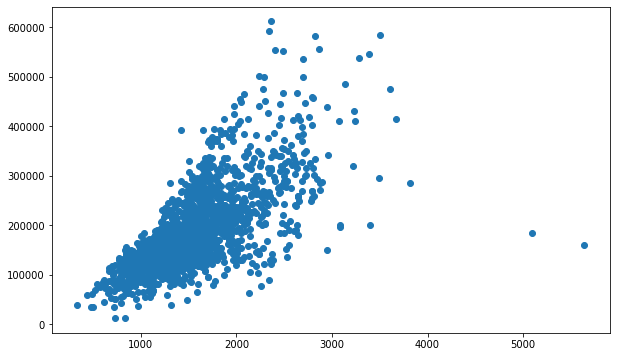

In [116]:
plt.figure(figsize=(10,6))
plt.scatter(train_df['Gr Liv Area'], train_df['SalePrice']);

In [117]:
train_df['SalePrice'].shape

(2051,)

In [118]:
X = train_df[['Gr Liv Area']]
y = train_df['SalePrice']

In [125]:
def slr_model(X, y):
#      Step 1: Assemble our X and y variables
#      We need an X matrix that is n-by-p (in this case, p = 1)
#      We need a y vector that is length n
    
#     Instantiate the model
    model = LinearRegression()  
    
#     Fit the model
    model.fit(X, y) 
    
#     Find the coefficient
    score = model.score(X, y)
    
    y_pred = model.predict(X)

#     Take a peek at the model coefficient and intercept
    y_intercept = model.intercept_
    y_coef = model.coef_
    
    return y_pred, y_intercept, y_coef

In [128]:
y_pred, y_intercept, y_coef = slr_model(X, y)

In [129]:
test_df.head(1)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD


In [157]:
pred_df = test_df[['Id', 'Gr Liv Area']]

In [158]:
pred_df['SalePrice'] = test_df['Gr Liv Area'] * y_coef + y_intercept

/Users/aidancurley/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [159]:
pred_df.drop(columns='Gr Liv Area', axis=1, inplace=True)

In [160]:
pred_df.to_csv('first_submission_aidan.csv', index=False)